In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pwd

'C:\\Users\\gupta\\Documents\\GitHub\\Project-1---Crime-Demographics-and-City-Response'

In [2]:
%run Final_Analysis.ipynb
#final_df = pd.read_csv('../Final_Data.csv')

C:\Users\gupta\Documents\GitHub\Project-1---Crime-Demographics-and-City-Response\Data Cleaning


In [3]:
final_df.head()

,Neighbourhood,Hood_ID,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Total Average Rate,Median_Income,Average_Income,Number of Starbucks Stores,Number of Red Lights,Speeding,Income Group
0,South Parkdale,85,1148.8,91.5,407.3,4.6,151.0,100.7,317.32,35601.0,46896.0,1.0,2.0,26.0,25-50K
1,South Riverdale,70,936.3,143.5,477.1,0.0,125.6,75.3,292.97,65076.0,83491.0,1.0,2.0,20.0,75-100K
2,St.Andrew-Windfields,40,325.6,196.5,466.0,0.0,67.4,33.7,181.53,94271.0,189629.0,1.0,1.0,3.0,175-200K
3,Taylor-Massey,61,777.9,76.5,401.7,6.4,82.9,19.1,227.42,40915.0,51242.0,0.0,NaN,4.0,50-75K
4,Humber Summit,21,950.4,1087.3,459.1,24.2,225.5,177.2,487.28,57786.0,68431.0,0.0,3.0,23.0,50-75K


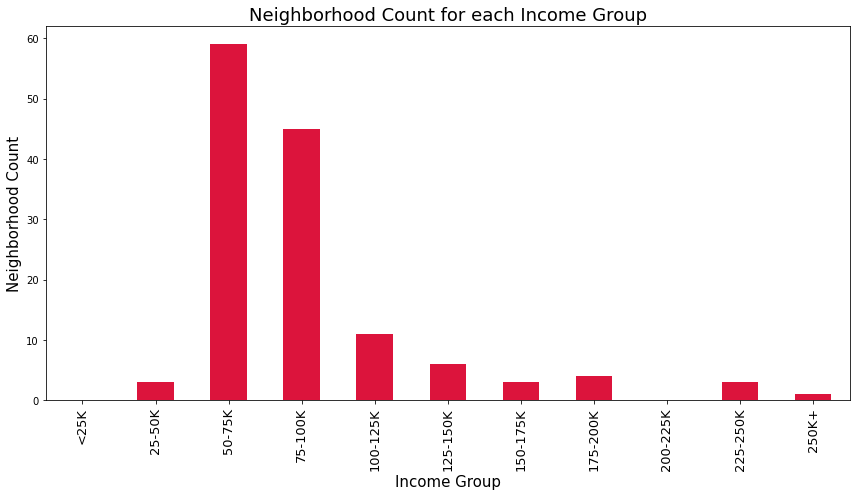

In [10]:
#Sort the data on Income
sorted_df = final_df.sort_values("Average_Income", ascending = True).drop(how='all', axis=0)

#Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = sorted_df.groupby(["Income Group"]).count()["Neighbourhood"]

#Plot the bar graph showing count of neighborhoods for each Income Range
count_neighborhood_df.plot(kind ='bar',color = 'crimson',figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Neighborhood Count",fontsize = 15)
plt.title("Neighborhood Count for each Income Group",fontsize = 18)

#Save the output and display resulting plot
plt.savefig("Neighborhood_Count_for_Income_Group.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()


In [6]:
#Fetch sum of each crime type for each Income Range
grouped_df =final_df.groupby(["Income Group"]).agg(
    {
         'Assault Rate':sum,    
         'Auto Theft Rate': sum,  
         'Break&Enter Rate': sum , 
        'Homicide Rate': sum,
        'Robberey Rate': sum,
        'Theft Over Rate': sum
    }
)

grouped_df.head()

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate
Income Group,,,,,,
<25K,0.0,0.0,0.0,0.0,0.0,0.0
25-50K,3705.1,358.1,1370.1,13.9,511.7,190.3
50-75K,50772.2,12656.7,16909.5,255.1,8845.3,2708.5
75-100K,29470.3,7752.4,13399.4,113.3,4710.0,2273.2
100-125K,5560.8,1732.2,3507.2,15.5,1085.3,524.3


In [7]:
# Count Neighborhoods for each Income group and append it to our dataframe
count_neighborhood_df = final_df.groupby(["Income Group"]).count()["Neighbourhood"] 
grouped_df["Count_Neighborhood"] = count_neighborhood_df

#Drop row if it has NaN values for all columns
grouped_df=grouped_df.replace(0,np.nan).dropna(thresh=6).fillna(0)
grouped_df

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Count_Neighborhood
Income Group,,,,,,,
25-50K,3705.1,358.1,1370.1,13.9,511.7,190.3,3.0
50-75K,50772.2,12656.7,16909.5,255.1,8845.3,2708.5,59.0
75-100K,29470.3,7752.4,13399.4,113.3,4710.0,2273.2,45.0
100-125K,5560.8,1732.2,3507.2,15.5,1085.3,524.3,11.0
125-150K,2382.4,787.0,1739.6,8.5,576.6,206.9,6.0
150-175K,723.8,500.5,792.7,0.0,179.5,116.6,3.0
175-200K,1308.4,658.4,1309.6,0.0,239.1,156.8,4.0
225-250K,1103.5,617.4,1069.0,0.0,369.3,147.3,3.0
250K+,197.6,184.5,382.1,0.0,85.6,52.7,1.0


In [8]:
#Divide each crime rate with Neighborhood count so as to find values per neighborhood
grouped_df["Assault Rate"] = (grouped_df["Assault Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Auto Theft Rate"] = (grouped_df["Auto Theft Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Break&Enter Rate"] = (grouped_df["Break&Enter Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Homicide Rate"] = (grouped_df["Homicide Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Robberey Rate"] = (grouped_df["Robberey Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df["Theft Over Rate"] = (grouped_df["Theft Over Rate"])/(grouped_df["Count_Neighborhood"])
grouped_df

,Assault Rate,Auto Theft Rate,Break&Enter Rate,Homicide Rate,Robberey Rate,Theft Over Rate,Count_Neighborhood
Income Group,,,,,,,
25-50K,1235.033333,119.366667,456.700000,4.633333,170.566667,63.433333,3.0
50-75K,860.545763,214.520339,286.601695,4.323729,149.920339,45.906780,59.0
75-100K,654.895556,172.275556,297.764444,2.517778,104.666667,50.515556,45.0
100-125K,505.527273,157.472727,318.836364,1.409091,98.663636,47.663636,11.0
125-150K,397.066667,131.166667,289.933333,1.416667,96.100000,34.483333,6.0
150-175K,241.266667,166.833333,264.233333,0.000000,59.833333,38.866667,3.0
175-200K,327.100000,164.600000,327.400000,0.000000,59.775000,39.200000,4.0
225-250K,367.833333,205.800000,356.333333,0.000000,123.100000,49.100000,3.0
250K+,197.600000,184.500000,382.100000,0.000000,85.600000,52.700000,1.0


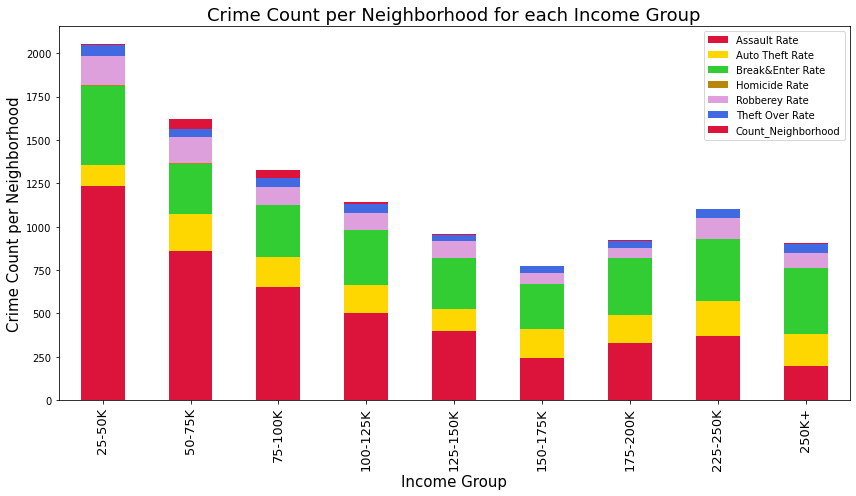

In [9]:
#Plot the bar graph showing crime count per neighborhood for each Income Range
colors = ['crimson','gold','limegreen','darkgoldenrod','plum','royalblue']
grouped_df.plot(kind ='bar', stacked = True,color = colors,figsize=(12,7))

# Set labels for axes
plt.xticks(rotation=90,fontsize = 13)
plt.xlabel("Income Group",fontsize = 15)
plt.ylabel("Crime Count per Neighborhood",fontsize = 15)
plt.title("Crime Count per Neighborhood for each Income Group",fontsize = 18)

#Save the output and display resulting plot
plt.savefig("Crime_Count_per_Neighborhood.png", bbox_inches = "tight")
plt.tight_layout()
plt.show()

#### The above graph shows Crime Count per neighborhood for each Income Group which depicts lower income regions have higher crime rate per neighborhood.